In [310]:
import yfinance as yf
import matplotlib.pyplot as plt
import numpy as np
from sklearn.preprocessing import MinMaxScaler

In [311]:
from numpy import array

In [312]:
import tensorflow as tf

In [313]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM

In [314]:
import math
from sklearn.metrics import mean_squared_error

In [315]:
tickerSymbol = 'AAPL'

In [316]:
tickerData = yf.Ticker(tickerSymbol)

In [317]:
tickerDf = tickerData.history(period='1d', start='2016-01-01', end='2024-01-01')

In [318]:
print(tickerDf.tail())

                                 Open        High         Low       Close  \
Date                                                                        
2023-12-22 00:00:00-05:00  194.931260  195.160978  192.724085  193.353287   
2023-12-26 00:00:00-05:00  193.363270  193.642911  192.584265  192.803986   
2023-12-27 00:00:00-05:00  192.244692  193.253399  190.846467  192.903839   
2023-12-28 00:00:00-05:00  193.892582  194.411923  192.923817  193.333298   
2023-12-29 00:00:00-05:00  193.652887  194.152249  191.485654  192.284637   

                             Volume  Dividends  Stock Splits  
Date                                                          
2023-12-22 00:00:00-05:00  37122800        0.0           0.0  
2023-12-26 00:00:00-05:00  28919300        0.0           0.0  
2023-12-27 00:00:00-05:00  48087700        0.0           0.0  
2023-12-28 00:00:00-05:00  34049900        0.0           0.0  
2023-12-29 00:00:00-05:00  42628800        0.0           0.0  


In [319]:
td1 = tickerDf.reset_index()['Close']

In [320]:
td1

0        23.946917
1        23.346827
2        22.889935
3        21.923872
4        22.039803
           ...    
2007    193.353287
2008    192.803986
2009    192.903839
2010    193.333298
2011    192.284637
Name: Close, Length: 2012, dtype: float64

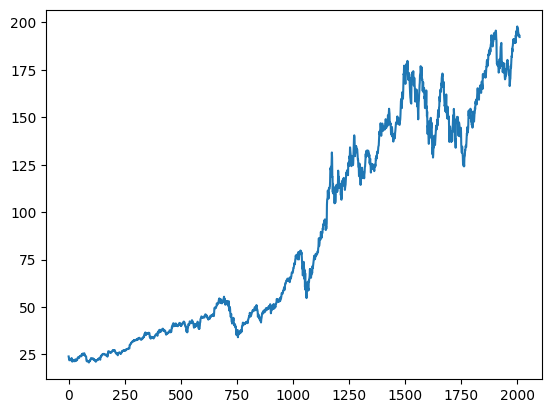

In [321]:
plt.plot(td1)

In [322]:
scaler = MinMaxScaler(feature_range=(0,1))
td1 = scaler.fit_transform(np.array(td1).reshape(-1,1))

In [323]:
print(td1)

[[0.01792787]
 [0.01453916]
 [0.01195909]
 ...
 [0.97202655]
 [0.9744517 ]
 [0.96852992]]


In [324]:
train_size = int(len(td1)*0.65)
test_size = len(td1) - train_size
train_data, test_data = td1[0 : train_size, :], td1[train_size : len(td1), : 1]

In [325]:
train_size, test_size

(1307, 705)

In [326]:
train_data

array([[0.01792787],
       [0.01453916],
       [0.01195909],
       ...,
       [0.54861317],
       [0.55960256],
       [0.55444073]])

In [327]:
def create_dataset(dataset, time_step = 1):
	dataX, dataY = [], []
	for i in range(len(dataset) - time_step - 1):
		a = dataset[i : (i + time_step), 0]
		dataX.append(a)
		dataY.append(dataset[i + time_step, 0])
	return np.array(dataX), np.array(dataY)

In [328]:
time_step = 100
X_train, y_train = create_dataset(train_data, time_step)
X_test, y_test = create_dataset(test_data, time_step)

In [329]:
print(X_train.shape), print(y_train.shape), print(X_test.shape), print(y_test.shape)

(1206, 100)
(1206,)
(604, 100)
(604,)


(None, None, None, None)

In [330]:
X_train = X_train.reshape(X_train.shape[0], X_train.shape[1] , 1)
X_test = X_test.reshape(X_test.shape[0], X_test.shape[1] , 1)

In [331]:
model = Sequential()
model.add(LSTM(50, return_sequences = True, input_shape=(100, 1)))
model.add(LSTM(50, return_sequences = True))
model.add(LSTM(50))
model.add(Dense(1))
model.compile(loss = 'mean_squared_error',optimizer = 'adam')

In [332]:
model.summary()

Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_24 (LSTM)              (None, 100, 50)           10400     
                                                                 
 lstm_25 (LSTM)              (None, 100, 50)           20200     
                                                                 
 lstm_26 (LSTM)              (None, 50)                20200     
                                                                 
 dense_8 (Dense)             (None, 1)                 51        
                                                                 
Total params: 50851 (198.64 KB)
Trainable params: 50851 (198.64 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [333]:
model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs = 100, batch_size = 64, verbose = 1)

Epoch 1/100
19/19 [==============================] - 12s 295ms/step - loss: 0.0116 - val_loss: 0.0034
Epoch 2/100
19/19 [==============================] - 4s 231ms/step - loss: 9.3741e-04 - val_loss: 0.0021
Epoch 3/100
19/19 [==============================] - 4s 184ms/step - loss: 4.8402e-04 - val_loss: 0.0032
Epoch 4/100
19/19 [==============================] - 3s 178ms/step - loss: 4.7333e-04 - val_loss: 0.0024
Epoch 5/100
19/19 [==============================] - 3s 178ms/step - loss: 4.5434e-04 - val_loss: 0.0024
Epoch 6/100
19/19 [==============================] - 4s 234ms/step - loss: 4.2704e-04 - val_loss: 0.0033
Epoch 7/100
19/19 [==============================] - 3s 182ms/step - loss: 4.2920e-04 - val_loss: 0.0019
Epoch 8/100
19/19 [==============================] - 3s 178ms/step - loss: 4.2097e-04 - val_loss: 0.0046
Epoch 9/100
19/19 [==============================] - 4s 232ms/step - loss: 4.1332e-04 - val_loss: 0.0041
Epoch 10/100
19/19 [==============================] - 3s 1

In [334]:
train_predict = model.predict(X_train)
test_predict = model.predict(X_test)

19/19 [==============================] - 1s 34ms/step


In [335]:
train_predict = scaler.inverse_transform(train_predict)
test_predict = scaler.inverse_transform(test_predict)

In [336]:
math.sqrt(mean_squared_error(y_train, train_predict))

62.11164190726211

In [337]:
math.sqrt(mean_squared_error(y_test, test_predict))

154.38740066773784

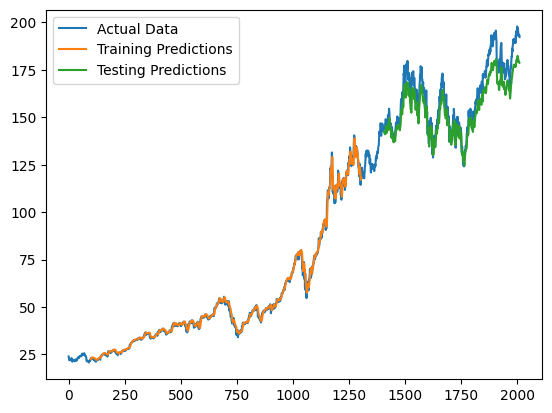

In [338]:
look_back=100
train_predict_plot = np.empty_like(td1)
train_predict_plot[:, :] = np.nan
train_predict_plot[look_back : len(train_predict) + look_back, :] = train_predict

test_predict_plot = np.empty_like(td1)
test_predict_plot[:, :] = np.nan
test_predict_plot[len(train_predict) + (look_back * 2) + 1 : len(td1) - 1, :] = test_predict

plt.plot(scaler.inverse_transform(td1), label='Actual Data')
plt.plot(train_predict_plot, label='Training Predictions')
plt.plot(test_predict_plot, label='Testing Predictions')

plt.legend()
plt.show()

In [339]:
len(test_data)

705

In [340]:
x_input = test_data[605 : ].reshape(1, -1)
x_input.shape

(1, 100)

In [341]:
temp_input = list(x_input)
temp_input = temp_input[0].tolist()

In [342]:
temp_input

[0.8849795544097929,
 0.8837421203758742,
 0.88408006454975,
 0.8934861486671954,
 0.8821650188423588,
 0.8772085617363722,
 0.8627334011770768,
 0.8654932211528711,
 0.8730968788987888,
 0.8809258614827191,
 0.9028358800335665,
 0.8761383764636703,
 0.8886985774818608,
 0.8975977453384927,
 0.9197330025610666,
 0.9396152699023737,
 0.9408544272620134,
 0.9498099478697202,
 0.951161638398937,
 0.9129178524987636,
 0.8827846406053217,
 0.8862766155136561,
 0.8929228796553073,
 0.8756878129539314,
 0.8639161196193557,
 0.8725337822194728,
 0.8684219270493173,
 0.8850938970713771,
 0.8912895115370032,
 0.8711255666066091,
 0.8623391042521263,
 0.8671828558559637,
 0.8744486555942917,
 0.8512432992653021,
 0.8426256366651851,
 0.8440902050291232,
 0.8470189970918556,
 0.8613252717304992,
 0.8537215278182954,
 0.8608183554696855,
 0.8678588303700011,
 0.8823904298466573,
 0.8908389480272643,
 0.8874595062885071,
 0.8954011082083007,
 0.9005266235675111,
 0.8900503541773637,
 0.8893181992448

In [343]:
lst_output=[]
n_steps=100
i=0
while(i < 90):

    if(len(temp_input)>100):
        # print("temp_input:", temp_input)
        x_input=np.array(temp_input[1:])

        print("{} day input {}".format(i,x_input))

        x_input=x_input.reshape(1,-1)
        x_input = x_input.reshape((1, n_steps, 1))
        # print("x_input:", x_input)

        yhat = model.predict(x_input, verbose=0)

        print("{} day output {}".format(i,yhat))

        temp_input.extend(yhat[0].tolist())
        temp_input=temp_input[1:]
        # print("temp_input:", temp_input)

        lst_output.extend(yhat.tolist())
        i = i + 1
    else:
        x_input = x_input.reshape((1, n_steps,1))
        yhat = model.predict(x_input, verbose=0)
        print(yhat[0])
        temp_input.extend(yhat[0].tolist())
        print(len(temp_input))
        lst_output.extend(yhat.tolist())
        i = i + 1


print(lst_output)

[0.89124286]
101
1 day input [0.88374212 0.88408006 0.89348615 0.88216502 0.87720856 0.8627334
 0.86549322 0.87309688 0.88092586 0.90283588 0.87613838 0.88869858
 0.89759775 0.919733   0.93961527 0.94085443 0.94980995 0.95116164
 0.91291785 0.88278464 0.88627662 0.89292288 0.87568781 0.86391612
 0.87253378 0.86842193 0.8850939  0.89128951 0.87112557 0.8623391
 0.86718286 0.87444866 0.8512433  0.84262564 0.84409021 0.847019
 0.86132527 0.85372153 0.86081836 0.86785883 0.88239043 0.89083895
 0.88745951 0.89540111 0.90052662 0.89005035 0.8893182  0.8804753
 0.87309688 0.87095668 0.85642508 0.85710097 0.8595792  0.84639955
 0.82268719 0.83017823 0.84183713 0.84454077 0.86256434 0.88284099
 0.87765913 0.89219064 0.9067785  0.91280515 0.91010159 0.93395794
 0.92493434 0.93982336 0.94303797 0.95262578 0.9525129  0.96243891
 0.95787072 0.96164937 0.95409207 0.95307686 0.95651713 0.95070815
 0.95397919 0.96125464 0.95104652 0.97354936 0.96734565 0.97834322
 0.98646448 0.97219578 0.98082473 0.99

In [344]:
day_new = np.arange(1,101)
day_pred = np.arange(101, 191)

In [345]:
len(td1)

2012

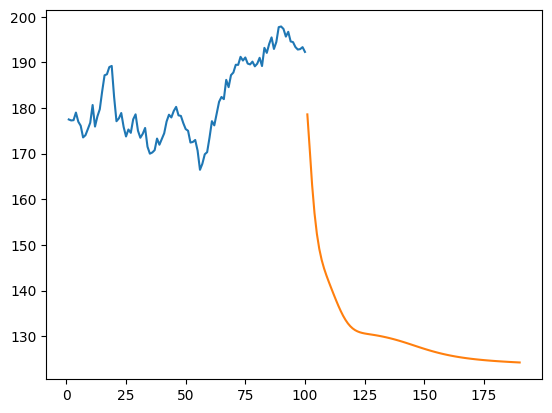

In [346]:
plt.plot(day_new, scaler.inverse_transform(td1[1912:]))
plt.plot(day_pred, scaler.inverse_transform(lst_output))

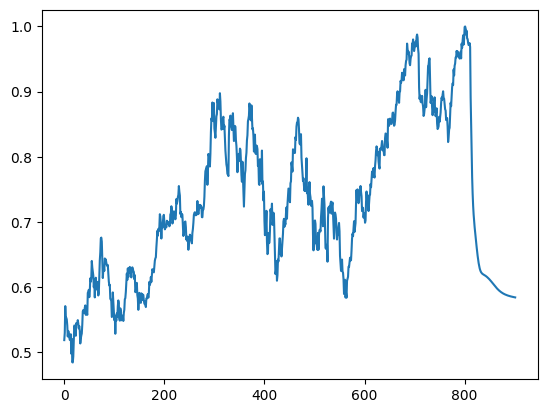

In [347]:
td3 = td1.tolist()
td3.extend(lst_output)
plt.plot(td3[1200:])